<a href="https://colab.research.google.com/github/nabilaaaa24/Machine-Learning/blob/main/ML_Praktikum_Modul_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buatlah sebuah model klasifikasi citra dari dataset berikut:

NIM Ganjil: [Dataset Praktikum NIM Ganjil](https://drive.google.com/file/d/17rgHOvmgE6hYkyWFgl4IMyv3OXDX_kgj/view)

# Persiapan Data

In [ ]:
!pip install gdown

import os

# Cek apakah folder sudah ada
if not os.path.exists("Dataset"):
    os.mkdir("Dataset")
    print("Folder 'Dataset' berhasil dibuat.")
else:
    print("Folder 'Dataset' sudah ada.")

Folder 'Dataset' berhasil dibuat.


In [ ]:
!gdown "17rgHOvmgE6hYkyWFgl4IMyv3OXDX_kgj" -O "Praktikum_NIM_Ganjil.zip"
!unzip "Praktikum_NIM_Ganjil.zip" -d "Dataset/"

Downloading...
From: https://drive.google.com/uc?id=17rgHOvmgE6hYkyWFgl4IMyv3OXDX_kgj
To: /content/Praktikum_NIM_Ganjil.zip
100% 2.10M/2.10M [00:00<00:00, 50.9MB/s]
Archive:  Praktikum_NIM_Ganjil.zip
   creating: Dataset/Praktikum_NIM_Ganjil/
   creating: Dataset/Praktikum_NIM_Ganjil/Beagle/
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_1.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_10.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_100.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_11.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_12.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_13.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_14.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_15.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_16.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_17.jpg  
  inflating: Dataset/Praktikum_NIM_Ganjil/Beagle/Beagle_1

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pathlib

## Constant Variable

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

IMG_HEIGHT, IMG_WIDTH = 255, 255
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 5
CLASSES = ["Beagle", "Bulldog", "German_Shepherd", "Labrador_Retriever", "Yorkshire_Terrire"]
DATASET_PATH = "./Dataset/Praktikum_NIM_Ganjil"

## Load Data

In [ ]:
data_dir = pathlib.Path(DATASET_PATH)

In [ ]:
# akan dibuat sebuah dataset dengan dua label, yaitu class_a dan class_b
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir, # path dataset
  validation_split=0.2, # jumlah validation data dalam tipe data float 0.0-1.0
  subset="training", # nama subset untuk variable ini, tersedia untuk training dan validation
  seed=123, # menetapkan seed agar dataset bisa kita produksi ulang
  image_size=(IMG_HEIGHT, IMG_WIDTH), # tentukan ukuran citra yang ingin digunakan
  batch_size=BATCH_SIZE, # jumlah batch tiap training
  labels='inferred'
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Alokasi 20% untuk validasi
    subset="validation",  # Subset untuk validasi
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    labels='inferred'  # Label diambil dari folder
)

Found 491 files belonging to 5 classes.
Using 393 files for training.
Found 491 files belonging to 5 classes.
Using 98 files for validation.


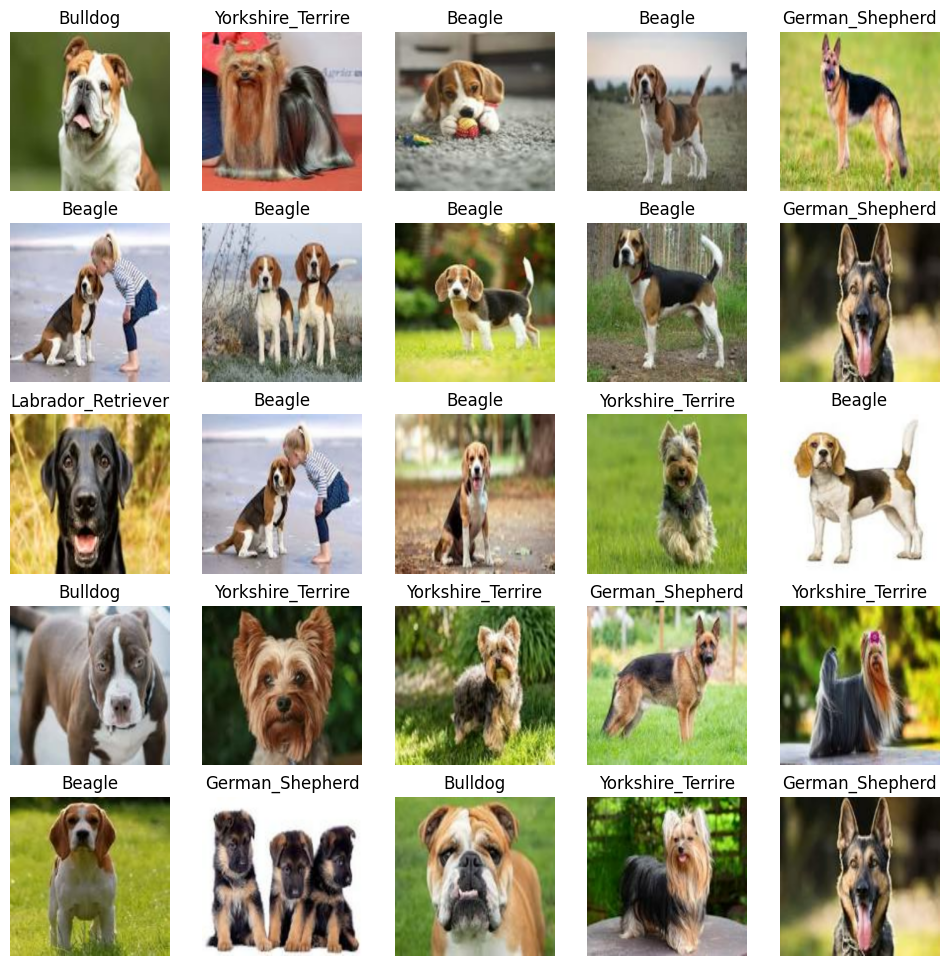

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASSES[labels[i]])
    plt.axis("off")

# Model

## Pembuatan Model

In [ ]:
model = Sequential([
    Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 62, 62, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 62, 62, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 30, 30, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 256)         │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │              

 Total params: 57,541,386 (219.50 MB)

 Trainable params: 57,538,634 (219.49 MB)

 Non-trainable params: 2,752 (10.75 KB)

## Pelatihan Model

In [ ]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_ds)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.2101 - loss: 51.6083 - val_accuracy: 0.1939 - val_loss: 102.4719
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.5599 - loss: 5.2964 - val_accuracy: 0.1531 - val_loss: 58.7282
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.6439 - loss: 3.7355 - val_accuracy: 0.1735 - val_loss: 70.8407
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.7479 - loss: 2.5764 - val_accuracy: 0.2551 - val_loss: 52.8593
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.7750 - loss: 2.3105 - val_accuracy: 0.1735 - val_loss: 18.0243
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 145s 7s/step - accuracy: 0.7892 - loss: 1.6987 - val_accuracy: 0.2449 - val_loss: 12.6179
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - accuracy: 0.8751 - loss: 0.9557 - val_accuracy: 0.2347 - val_loss: 13.7806
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 144s 7s/step - accuracy: 0.9263 - loss: 0.5782 - val_accuracy: 0.15

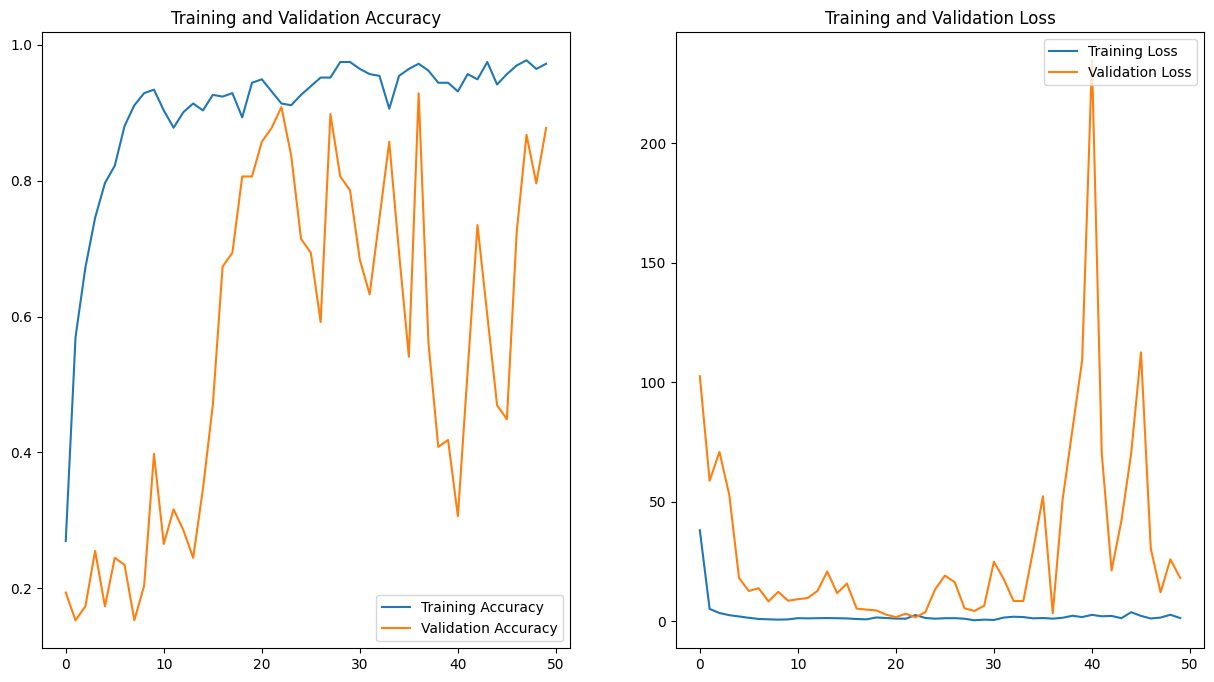

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluasi

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 933ms/step - accuracy: 0.8760 - loss: 17.0550
Test accuracy : 0.8775510191917419
Test loss : 18.062793731689453


In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=CLASSES))

                    precision    recall  f1-score   support

            Beagle       0.79      1.00      0.88        22
           Bulldog       1.00      0.62      0.77        16
   German_Shepherd       0.84      1.00      0.91        16
Labrador_Retriever       0.88      0.88      0.88        25
 Yorkshire_Terrire       1.00      0.84      0.91        19

          accuracy                           0.88        98
         macro avg       0.90      0.87      0.87        98
      weighted avg       0.90      0.88      0.87        98



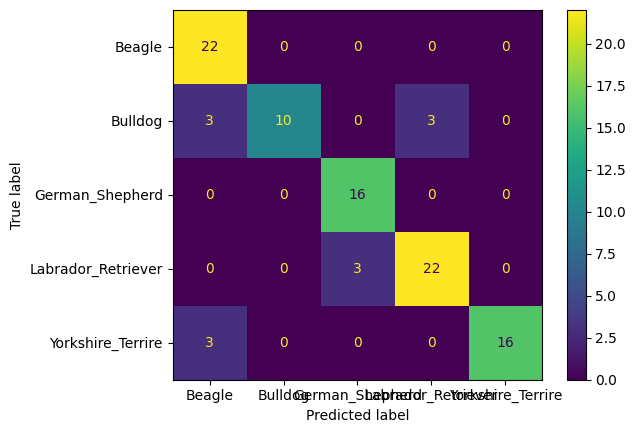

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot()
plt.show()